In [2]:
import pandas as pd

In [3]:
pd.__version__

'2.2.3'

In [4]:
df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")

In [5]:
df.shape

(3066766, 19)

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


## Q1. Downloading the data

We'll use the same [NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for `January` and `February 2023`.

Read the data for `January`. How many columns are there?

In [9]:
print(f"Number of columns in the dataset: {len(df.columns)} columns")

Number of columns in the dataset: 19 columns


# Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes.

What's the `standard deviation` of the trips `duration` in January?

In [10]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

Since `tpep_pickup_datetime` and `tpep_pickup_datetime` are already parsed as `datetime`, we can use them to compute the duration without any extra conversions

In [11]:
df['duration'] = round((df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds()/60, 2)

In [12]:
print(f"The standard deviation of the trips duration in January: {round(df['duration'].std(), 2)} minutes")

The standard deviation of the trips duration in January: 42.59 minutes


# Q3. Dropping outliers

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [27]:
df["duration"].describe()

count    3.066766e+06
mean     1.566899e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.120000e+00
50%      1.152000e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

Some trips have duration less than 0 min, which is not possible. Let's investigate these entries just to verify that we did not make any errors during out computaion

In [28]:
df[df["duration"] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
1839180,1,2023-01-20 13:35:00,2023-01-20 13:05:48,1.0,0.8,99.0,N,227,14,1,16.5,0.0,0.5,0.0,0.0,1.0,18.0,0.0,0.0,-29.20
2124414,1,2023-01-23 10:43:58,2023-01-23 10:29:26,1.0,2.4,99.0,N,102,82,1,21.5,0.0,0.5,0.0,0.0,1.0,23.0,0.0,0.0,-14.53
2218504,1,2023-01-24 11:00:00,2023-01-24 10:40:48,1.0,0.4,99.0,N,247,169,1,15.5,0.0,0.5,0.0,0.0,1.0,17.0,0.0,0.0,-19.20


Seems like the timestamps are the issue. The `tpep_dropotpep_pickup_datetimeff_datetime` > `tpep_dropoff_datetime`, which does not make any sense. We do not need to worry about these entries though, since they will be dropped anyway.

<Axes: >

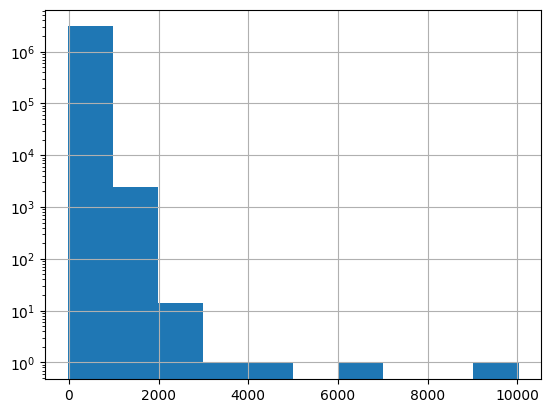

In [13]:
df["duration"].hist(log=True)

In [15]:
filtered_df = df[(df["duration"] >= 1) & (df["duration"] <= 60)]

In [24]:
print(f"Fraction of records left after filtering: {round(100*(filtered_df.shape[0])/df.shape[0], 0)}%")

Fraction of records left after filtering: 98.0%


# Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

- Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
- Fit a dictionary vectorizer
- Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [32]:
locationId_columns = ["PULocationID", "DOLocationID"]
df[locationId_columns].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [34]:
df[locationId_columns].astype(str)
df[locationId_columns].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object